## Haberman EDA Assignment

1. Download Haberman Cancer Survival dataset from Kaggle. You may have to create a Kaggle account to donwload data. (https://www.kaggle.com/gilsousa/habermans-survival-data-set)
2. Perform a similar analysis as above on this dataset with the following sections:
* High level statistics of the dataset: number of points, numer of   features, number of classes, data-points per class.
* Explain our objective. 
* Perform Univaraite analysis(PDF, CDF, Boxplot, Voilin plots) to understand which features are useful towards classification.
* Perform Bi-variate analysis (scatter plots, pair-plots) to see if combinations of features are useful in classfication.
* Write your observations in english as crisply and unambigously as possible. Always quantify your results.

## 1.1 Observations

**Objective**: Find a method based on given features to classify the survival status of a patient.

* **Number of points**: 305
* **Number of features**: 4
    - age: Age of patient at time of operation (numerical)
    - operation_year: Patient's year of operation (year - 1900, numerical)
    - axil_nodes: Number of positive axillary nodes detected (numerical)
    - surv_status: Survival status (class attribute) 1 = the patient survived 5 years or longer 2 = the patient died within 5 year
* **Number of classes**: 2
* **Number of data points per class**:
    - surv_status(1): 224
    - surv_status(2): 81

## 1.2 Obersvations

* **Univariate Analysis**:
    - Histograms: No clear distinction between surv_status (1 & 2) pdf graphs when considering single featues (age, operation_year, axis_nodes). Massive overlaps between the graphs for surv_status = 1 & surv_status = 2.
    - BoxPlots: Massive overlaps between 25th, 50th & 75th percentile data points for surv_status = 1 & 2 when considering single featues (age, axil_nodes, operation_year)
    - ViolinPlots: Overlaps between quantiles. Cannot clearly distinguish or make a segregtion amongst the classes (1, 2)

* **Bivariate Analysis**:
    - Pair plots: Cannot clearly disitinguish amongst both classes. No clear segregation between the two classes.
        
* **PDF CDF**: 
    - Lots of overlaps between the pdf of both classes (1 & 2)
    - cdf of both classes follow a similar path after a given point making it difficult to distinguish between the 2 classes.
    
**Conclusion**: Unclear to distinguish between the 2 classes (1 & 2) using the methods used above.

In [31]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [32]:
df = pd.read_csv('haberman.csv')
df.columns = ['age', 'operation_year', 'axil_nodes', 'surv_status']
df.head()

,age,operation_year,axil_nodes,surv_status
0,30,62,3,1
1,30,65,0,1
2,31,59,2,1
3,31,65,4,1
4,33,58,10,1


In [33]:
df.shape

(305, 4)

In [34]:
df['surv_status'].value_counts()

1    224
2     81
Name: surv_status, dtype: int64

## 2.0 Bivariate Analysis

### 2.1 Pair Plots

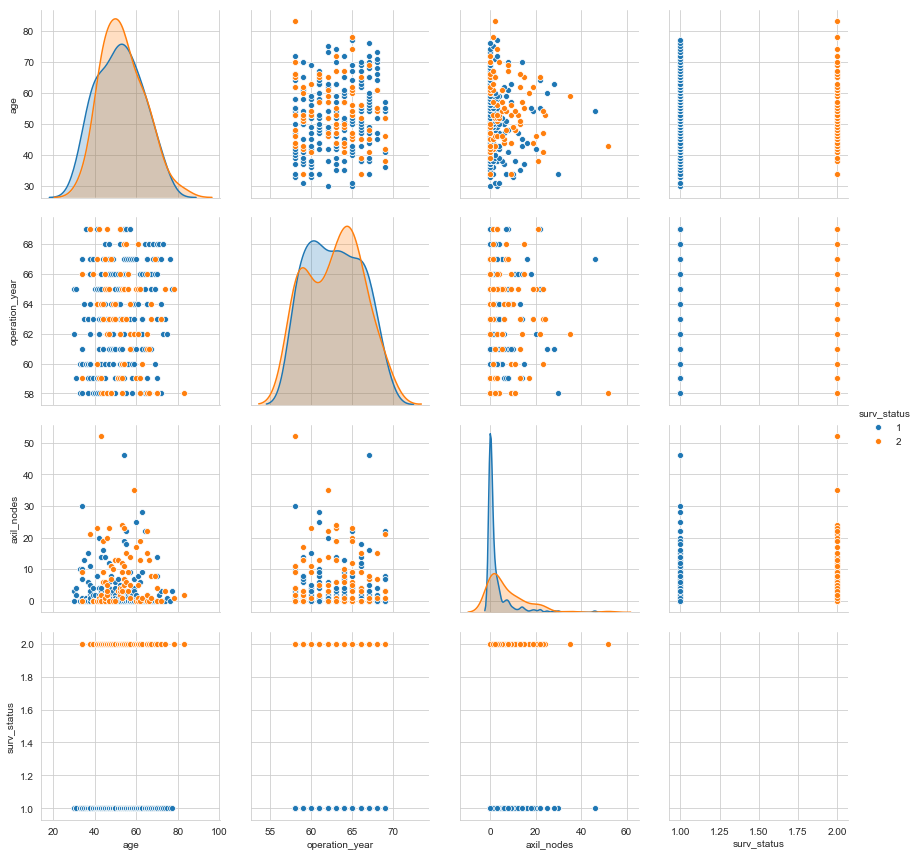

In [35]:
plt.close()
sns.set_style('whitegrid')
sns.pairplot(df, hue='surv_status',size=3)
plt.show()

### 2.2 Scatter Plots

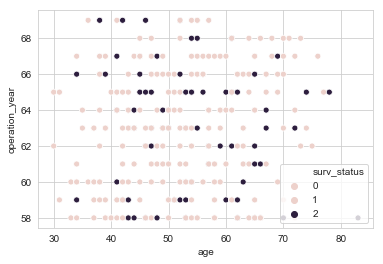

In [36]:
sns.scatterplot(data=df, x='age', y='operation_year', hue='surv_status')
plt.show()

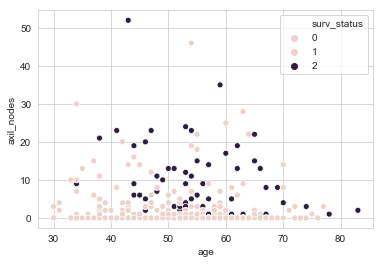

In [37]:
sns.scatterplot(data=df, x='age', y='axil_nodes', hue='surv_status')
plt.show()

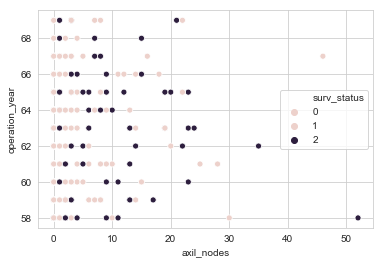

In [38]:
sns.scatterplot(data=df, x='axil_nodes', y='operation_year', hue='surv_status')
plt.show()

## 3.0 Univariate Analysis

In [39]:
df_surv = df[df['surv_status'] == 1]
df_unsurv = df[df['surv_status'] == 2]

### 3.1 Histograms

sns.FacetGrid(df, hue='surv_status', size=5) \
   .map(sns.distplot, 'age', ) \
   .add_legend()
plt.show()

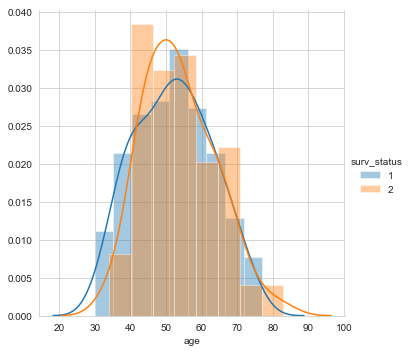

In [59]:
sns.FacetGrid(df, hue='surv_status', size=5) \
   .map(sns.distplot, 'age', ) \
   .add_legend()
plt.show()

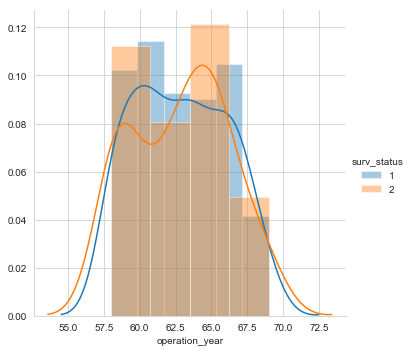

In [40]:
sns.FacetGrid(df, hue='surv_status', size=5) \
   .map(sns.distplot, 'operation_year', ) \
   .add_legend()
plt.show()

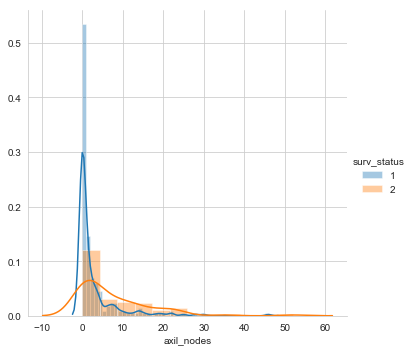

In [41]:
sns.FacetGrid(df, hue='surv_status', size=5) \
   .map(sns.distplot, 'axil_nodes', ) \
   .add_legend()
plt.show()

### 3.2 Box Plots

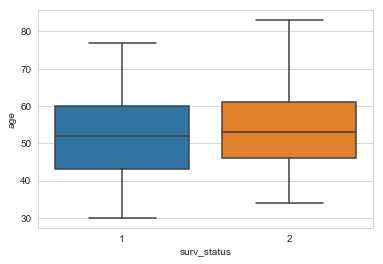

In [42]:
sns.boxplot(x='surv_status', y='age', data=df)
plt.show()

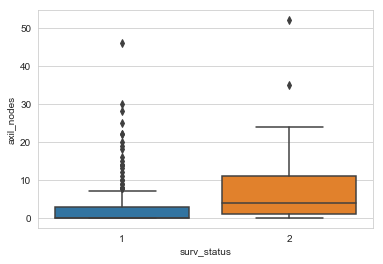

In [43]:
sns.boxplot(x='surv_status', y='axil_nodes', data=df)
plt.show()

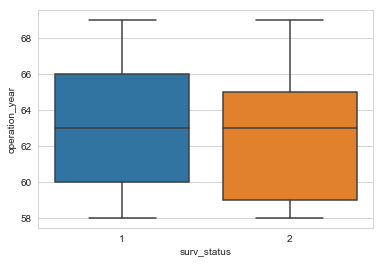

In [44]:
sns.boxplot(x='surv_status', y='operation_year', data=df)
plt.show()

### 3.3 Violin Plots

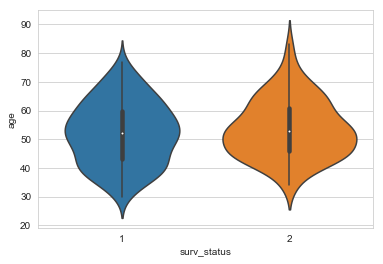

In [45]:
sns.violinplot(x='surv_status', y='age', data=df)
plt.show()

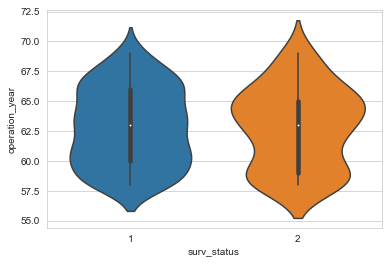

In [46]:
sns.violinplot(x='surv_status', y='operation_year', data=df)
plt.show()

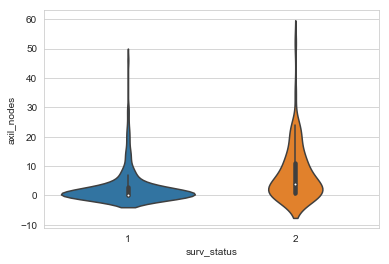

In [47]:
sns.violinplot(x='surv_status', y='axil_nodes', data=df)
plt.show()

### 3.4 PDF & CDF

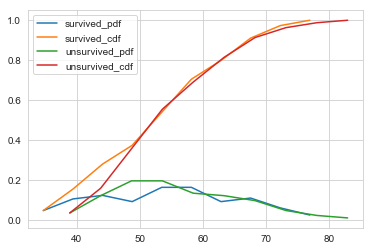

In [58]:
df_surv = df[df['surv_status'] == 1]
df_couldnt_surv = df[df['surv_status'] == 2]

counts, bin_edges = np.histogram(df_surv['age'], bins=10, density=False)
pdf = counts/sum(counts)
cdf = np.cumsum(pdf)

plt.plot(bin_edges[1:], pdf)
plt.plot(bin_edges[1:], cdf)

counts, bin_edges = np.histogram(df_couldnt_surv['age'], bins=10, density=False)
pdf = counts/sum(counts)
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:], pdf)
plt.plot(bin_edges[1:], cdf)
plt.legend(['survived_pdf', 'survived_cdf', 'unsurvived_pdf', 'unsurvived_cdf'])

plt.show()